# Data Preprocessing

In [21]:
# Libraries for preprocessing, clustering, and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Load the dataset
data = pd.read_csv("sales_data_sample.csv", encoding='unicode_escape')

data

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


In [22]:

# Preprocessing
data['ADDRESSLINE2'].fillna('Unknown', inplace=True)
data['STATE'].fillna('Unknown', inplace=True)
data['TERRITORY'].fillna('Unassigned', inplace=True)

data['ORDERDATE'] = pd.to_datetime(data['ORDERDATE'])

encoder = LabelEncoder()
categorical_cols = ['PRODUCTLINE', 'COUNTRY', 'STATUS']
for col in categorical_cols:
    data[col + '_encoded'] = encoder.fit_transform(data[col])

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ORDERNUMBER          2823 non-null   int64         
 1   QUANTITYORDERED      2823 non-null   int64         
 2   PRICEEACH            2823 non-null   float64       
 3   ORDERLINENUMBER      2823 non-null   int64         
 4   SALES                2823 non-null   float64       
 5   ORDERDATE            2823 non-null   datetime64[ns]
 6   STATUS               2823 non-null   object        
 7   QTR_ID               2823 non-null   int64         
 8   MONTH_ID             2823 non-null   int64         
 9   YEAR_ID              2823 non-null   int64         
 10  PRODUCTLINE          2823 non-null   object        
 11  MSRP                 2823 non-null   int64         
 12  PRODUCTCODE          2823 non-null   object        
 13  CUSTOMERNAME         2823 non-nul

<ipython-input-22-e9a0a81e2c25>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['ADDRESSLINE2'].fillna('Unknown', inplace=True)
<ipython-input-22-e9a0a81e2c25>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

# Feature Analysis

In [23]:
# Detailed statistical summary
print(data[['SALES', 'QUANTITYORDERED', 'PRICEEACH']].describe())

              SALES  QUANTITYORDERED    PRICEEACH
count   2823.000000      2823.000000  2823.000000
mean    3553.889072        35.092809    83.658544
std     1841.865106         9.741443    20.174277
min      482.130000         6.000000    26.880000
25%     2203.430000        27.000000    68.860000
50%     3184.800000        35.000000    95.700000
75%     4508.000000        43.000000   100.000000
max    14082.800000        97.000000   100.000000


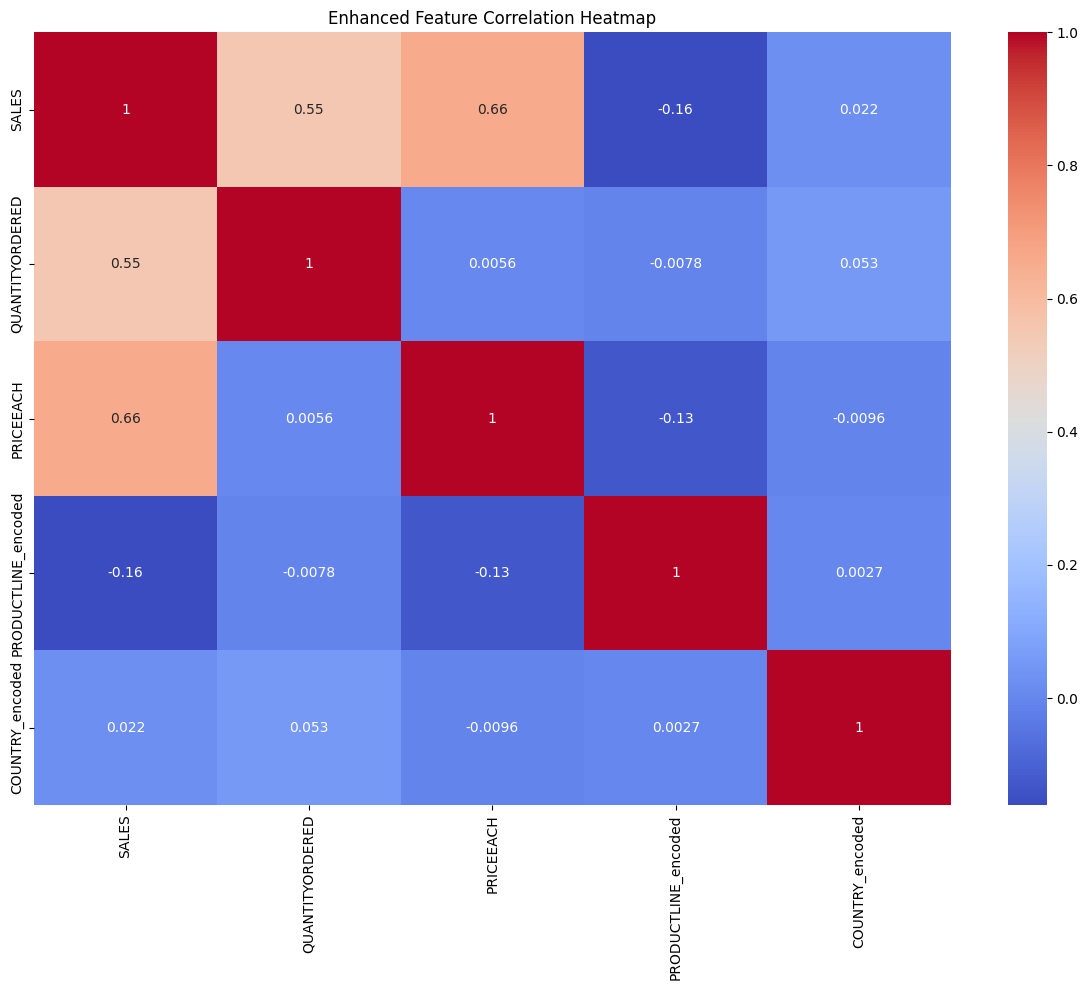

<ipython-input-24-ed9933d90b53>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45)
<ipython-input-24-ed9933d90b53>:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45)


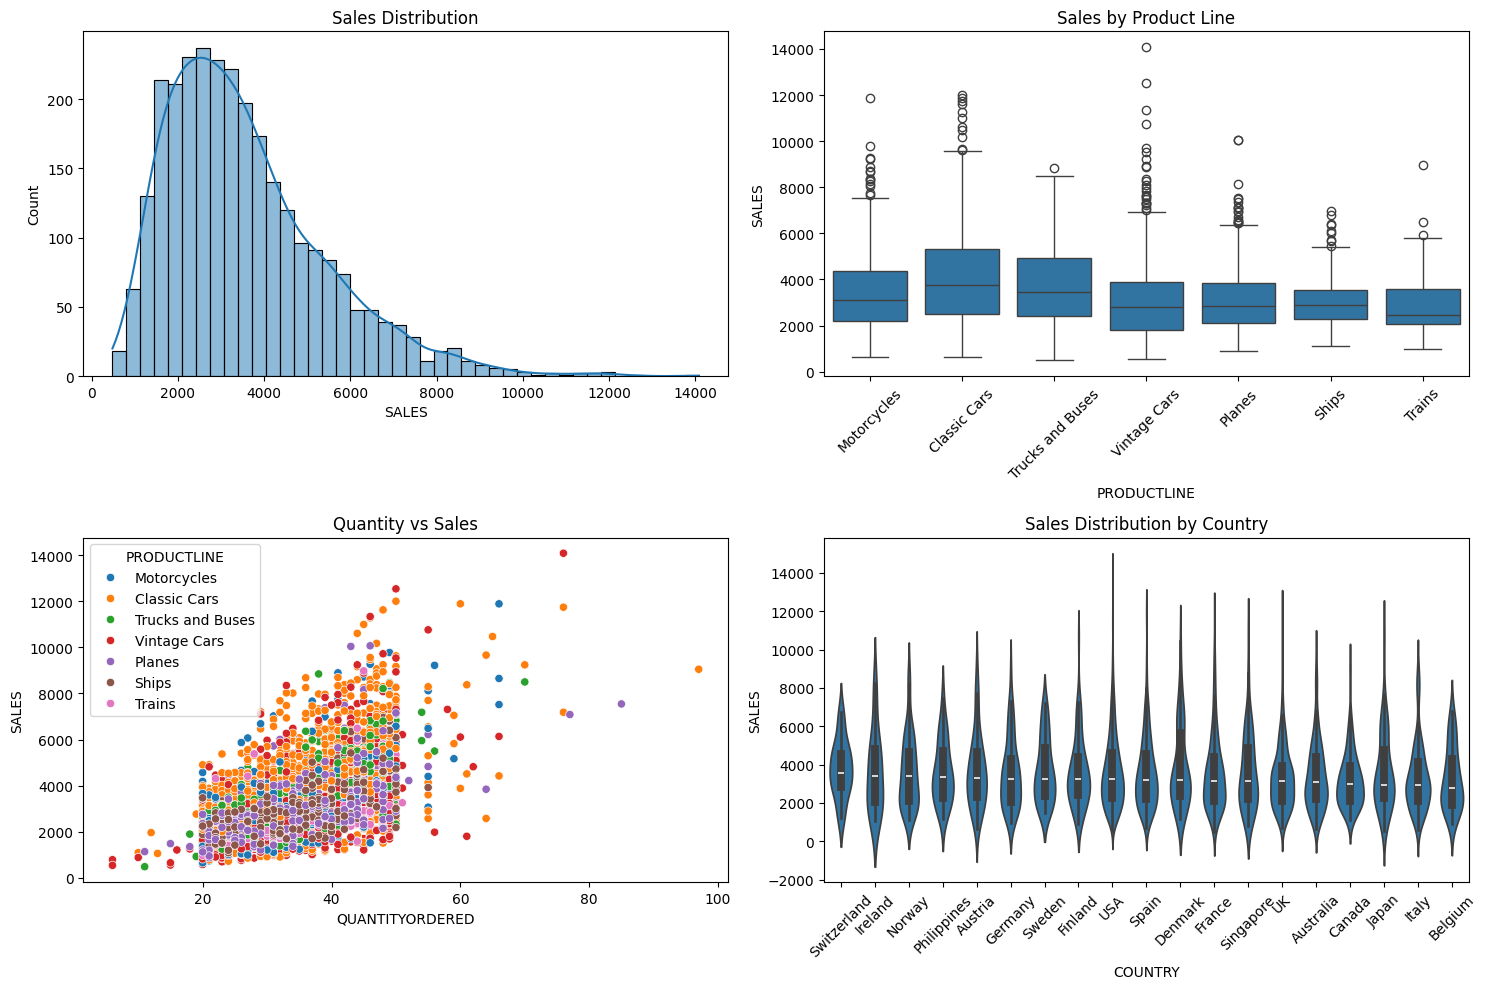

In [24]:
# Correlation heatmap with more features
plt.figure(figsize=(12, 10))
correlation_features = ['SALES', 'QUANTITYORDERED', 'PRICEEACH',
                        'PRODUCTLINE_encoded', 'COUNTRY_encoded']
sns.heatmap(data[correlation_features].corr(), annot=True, cmap='coolwarm')
plt.title('Enhanced Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

# Distribution plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.histplot(data['SALES'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Sales Distribution')

sns.boxplot(x='PRODUCTLINE', y='SALES', data=data, ax=axes[0, 1])
axes[0, 1].set_title('Sales by Product Line')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45)

sns.scatterplot(x='QUANTITYORDERED', y='SALES', hue='PRODUCTLINE', data=data, ax=axes[1, 0])
axes[1, 0].set_title('Quantity vs Sales')

sorted_countries = data.groupby('COUNTRY')['SALES'].median().sort_values(ascending=False).index
sns.violinplot(x='COUNTRY', y='SALES', data=data, ax=axes[1, 1], order=sorted_countries)
axes[1, 1].set_title('Sales Distribution by Country')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

Feature analysis reveals that sales and price have a strong positive correlation, while product categories and country are vital drivers for segmentation. This insight guides us to retain these variables for clustering to capture meaningful patterns in customer behavior.

# Advanced Dimensionality Reduction

## PCA Implementation

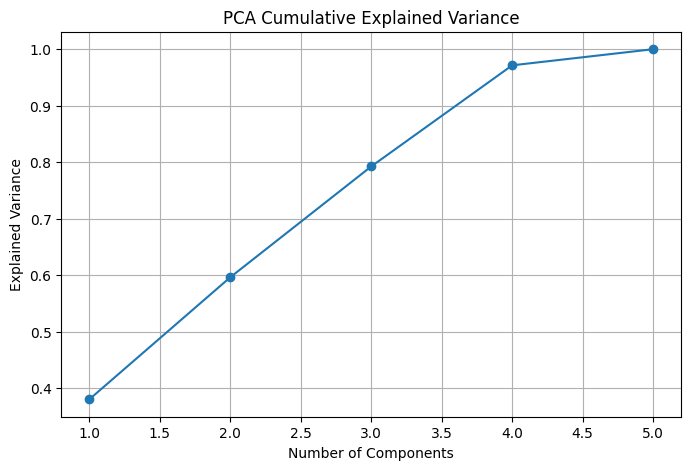

Number of components retained for 90% variance: 4


In [25]:
# Select numerical features
numerical_features = ['SALES', 'QUANTITYORDERED', 'PRICEEACH', 'PRODUCTLINE_encoded', 'COUNTRY_encoded']
X = data[numerical_features]

# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA Implementation
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Plot PCA cumulative explained variance
plt.figure(figsize=(8, 5))
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('PCA Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.grid()
plt.show()

# Selecting optimal number of PCA components
n_components = np.argmax(cumulative_variance >= 0.90) + 1
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

print(f"Number of components retained for 90% variance: {n_components}")


## Autoencoder Implementation

In [26]:
# Autoencoder Implementation
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

input_dim = X_scaled.shape[1]
encoding_dim = n_components

# Autoencoder model
input_layer = Input(shape=(input_dim,))
encoded = Dense(64, activation='relu')(input_layer)
encoded = Dense(32, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)

decoded = Dense(32, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(decoded)
decoded = Dense(input_dim, activation='linear')(decoded)

autoencoder = Model(input_layer, decoded)
encoder = Model(input_layer, encoded)

autoencoder.compile(optimizer='adam', loss='mse')

# Train autoencoder
history = autoencoder.fit(X_scaled, X_scaled, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Get compressed representation
X_autoencoder = encoder.predict(X_scaled)

Epoch 1/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.9401 - val_loss: 0.2995
Epoch 2/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3130 - val_loss: 0.1800
Epoch 3/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1647 - val_loss: 0.1673
Epoch 4/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1135 - val_loss: 0.1470
Epoch 5/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0689 - val_loss: 0.1377
Epoch 6/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0514 - val_loss: 0.1247
Epoch 7/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0417 - val_loss: 0.1096
Epoch 8/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0380 - val_loss: 0.0970
Epoch 9/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0312 - val_loss: 0.0842
Epoch 10/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0262 - val_loss: 0.0809
Epoch 11/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0229 - val_loss: 0.0697
Epoch 12/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0246 - val_lo

PCA reduced the data to 4 dimensions while retaining 90% of the variance, and the Autoencoder compressed the data to the same dimensions with minimal reconstruction loss. This demonstrates the effectiveness of both methods in simplifying the data while preserving its structure.

Reconstruction Error (PCA): 0.028497510209366
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Reconstruction Error (Autoencoder): 0.009886898407767448


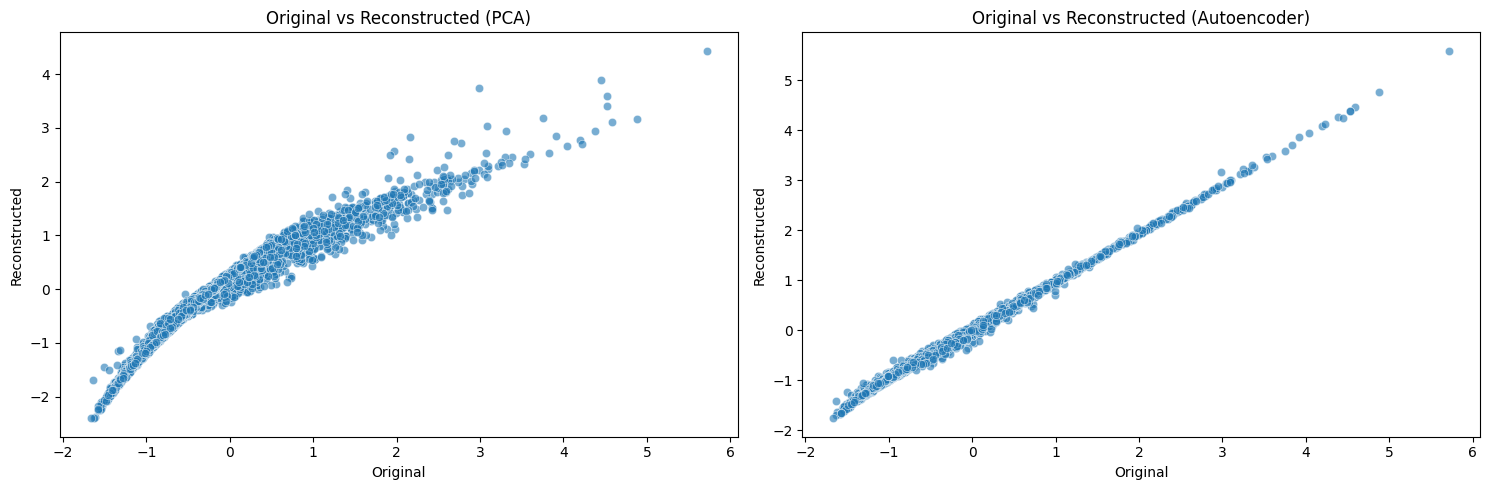

In [38]:
from sklearn.metrics import mean_squared_error

# Reconstruction Error for PCA
X_pca_reconstructed = pca.inverse_transform(X_pca)
pca_reconstruction_error = mean_squared_error(X_scaled, X_pca_reconstructed)
print(f"Reconstruction Error (PCA): {pca_reconstruction_error}")

# Reconstruction Error for Autoencoder
X_autoencoder_reconstructed = autoencoder.predict(X_scaled)
autoencoder_reconstruction_error = mean_squared_error(X_scaled, X_autoencoder_reconstructed)
print(f"Reconstruction Error (Autoencoder): {autoencoder_reconstruction_error}")

# Visualization of Reconstructed vs Original Data
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# PCA Reconstruction
sns.scatterplot(x=X_scaled[:, 0], y=X_pca_reconstructed[:, 0], ax=axes[0], alpha=0.6)
axes[0].set_title("Original vs Reconstructed (PCA)")
axes[0].set_xlabel("Original")
axes[0].set_ylabel("Reconstructed")

# Autoencoder Reconstruction
sns.scatterplot(x=X_scaled[:, 0], y=X_autoencoder_reconstructed[:, 0], ax=axes[1], alpha=0.6)
axes[1].set_title("Original vs Reconstructed (Autoencoder)")
axes[1].set_xlabel("Original")
axes[1].set_ylabel("Reconstructed")

plt.tight_layout()
plt.show()


**Dimensionality Reduction Comparison**

"The comparison between PCA and Autoencoder reveals the strengths of each method. PCA, being a linear technique, effectively reduces dimensionality while maintaining computational efficiency. However, its inability to capture non-linear relationships limits its reconstruction accuracy. Conversely, the Autoencoder, with its non-linear transformations, excels at preserving complex data structures, as reflected in its superior reconstruction quality. This advantage, however, comes at the cost of higher computational demands during training."

**Choosing Between PCA and Autoencoder**

"The choice between PCA and Autoencoder depends on the use case. For tasks prioritizing speed and interpretability, PCA is preferable. For scenarios requiring high fidelity and capturing intricate data patterns, the Autoencoder is a better fit. In this project, the Autoencoder's ability to enhance clustering performance justifies its computational overhead, making it the optimal choice."

# Clustering comparison

## Finding right number of clusters using elbow method for K-Means clustering

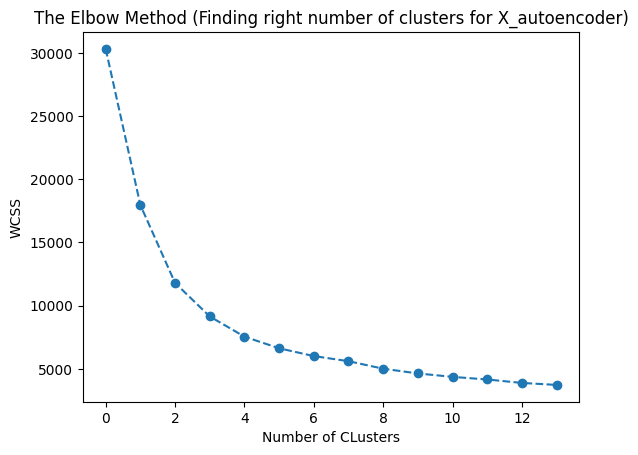

In [27]:
wcss = []
for i in range(1,15):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_autoencoder)
    wcss.append(kmeans.inertia_) # intertia is the Sum of squared distances of samples to their closest cluster center (WCSS)

plt.plot(wcss, marker='o', linestyle='--')
plt.title('The Elbow Method (Finding right number of clusters for X_autoencoder)')
plt.xlabel('Number of CLusters')
plt.ylabel('WCSS')
plt.show()

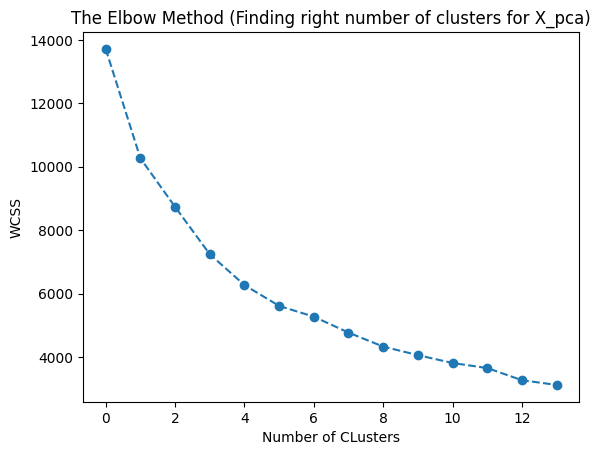

In [28]:
wcss = []
for i in range(1,15):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_) # intertia is the Sum of squared distances of samples to their closest cluster center (WCSS)

plt.plot(wcss, marker='o', linestyle='--')
plt.title('The Elbow Method (Finding right number of clusters for X_pca)')
plt.xlabel('Number of CLusters')
plt.ylabel('WCSS')
plt.show()

## Finding Optimal Parameters for DBSCAN (eps and min_samples)

In [29]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Grid search parameters
eps_values = np.arange(0.1, 1.0, 0.1)  # Adjust range based on nearest neighbor plot
min_samples_values = range(3, 10)

best_eps = None
best_min_samples = None
best_score = -1

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(X_autoencoder)
        labels = dbscan.labels_
        # Ignore noise-only models
        if len(set(labels)) > 1:
            score = silhouette_score(X_autoencoder, labels)
            if score > best_score:
                best_eps = eps
                best_min_samples = min_samples
                best_score = score

print("Best eps for X_autoencoder:", best_eps)
print("Best min_samples for X_autoencoder:", best_min_samples)
print("Best Silhouette Score for X_autoencoder:", best_score)

Best eps for X_autoencoder: 0.9
Best min_samples for X_autoencoder: 5
Best Silhouette Score for X_autoencoder: 0.46839613


In [30]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Grid search parameters
eps_values = np.arange(0.1, 1.0, 0.1)  # Adjust range based on nearest neighbor plot
min_samples_values = range(3, 10)

best_eps = None
best_min_samples = None
best_score = -1

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(X_pca)
        labels = dbscan.labels_
        # Ignore noise-only models
        if len(set(labels)) > 1:
            score = silhouette_score(X_pca, labels)
            if score > best_score:
                best_eps = eps
                best_min_samples = min_samples
                best_score = score

print("Best eps for X_pca:", best_eps)
print("Best min_samples for X_pca:", best_min_samples)
print("Best Silhouette Score for X_pca:", best_score)

Best eps for X_pca: 0.9
Best min_samples for X_pca: 5
Best Silhouette Score for X_pca: 0.38158768980884694


## Multiple clustering algorithms implementation

Clustering Evaluation Metrics:
                       Silhouette Score  Davies-Bouldin Index
K-Means (PCA)                  0.227198              1.539795
K-Means (Autoencoder)          0.379060              0.907138
DBSCAN (PCA)                   0.381588              1.964205
DBSCAN (Autoencoder)           0.468396              1.079985


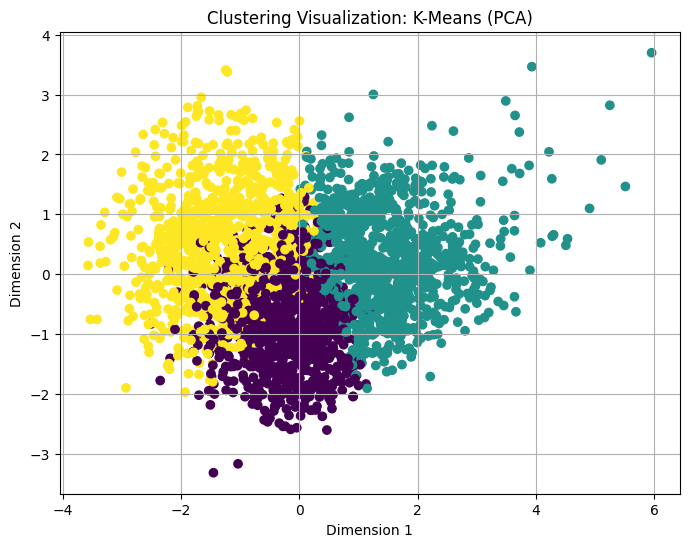

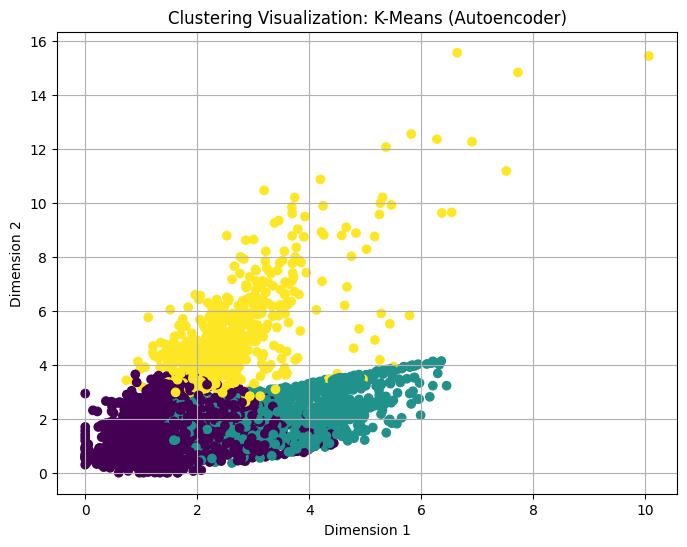

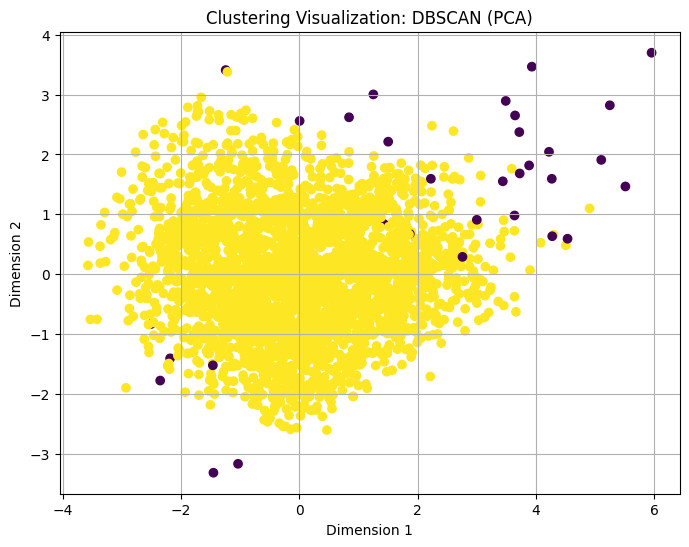

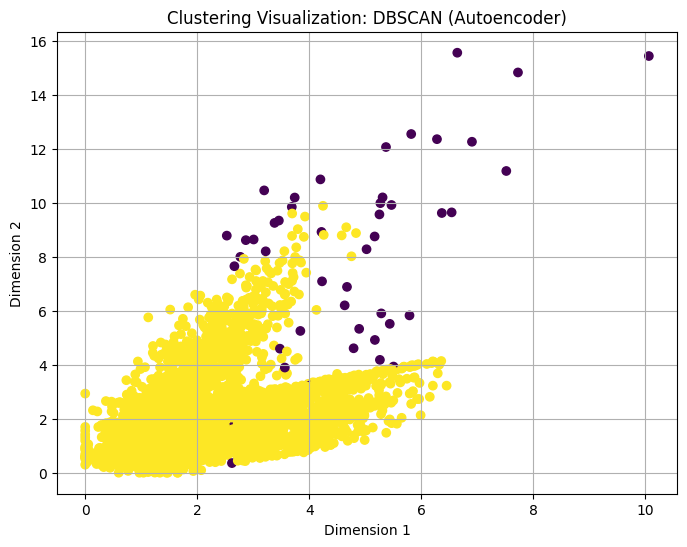

In [31]:
# Clustering (K-Means and DBSCAN)
clustering_methods = {
    "K-Means (PCA)": KMeans(n_clusters=3).fit(X_pca),
    "K-Means (Autoencoder)": KMeans(n_clusters=3, random_state=42).fit(X_autoencoder),
    "DBSCAN (PCA)": DBSCAN(eps=0.9, min_samples=5).fit(X_pca),
    "DBSCAN (Autoencoder)": DBSCAN(eps=0.9, min_samples=5).fit(X_autoencoder)
}

# Evaluate clustering
results = {}
for name, model in clustering_methods.items():
    labels = model.labels_
    if len(set(labels)) > 1:
        silhouette = silhouette_score(X_pca if "PCA" in name else X_autoencoder, labels)
        davies_bouldin = davies_bouldin_score(X_pca if "PCA" in name else X_autoencoder, labels)
    else:
        silhouette = davies_bouldin = np.nan
    results[name] = {"Silhouette Score": silhouette, "Davies-Bouldin Index": davies_bouldin}

# Display results
results_df = pd.DataFrame(results).T
print("Clustering Evaluation Metrics:")
print(results_df)

# Visualize clusters
for name, model in clustering_methods.items():
    plt.figure(figsize=(8, 6))
    labels = model.labels_
    plt.scatter(X_pca[:, 0] if "PCA" in name else X_autoencoder[:, 0],
                X_pca[:, 1] if "PCA" in name else X_autoencoder[:, 1],
                c=labels, cmap='viridis', marker='o')
    plt.title(f"Clustering Visualization: {name}")
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.grid()
    plt.show()


**Clustering Evaluation Metrics:**

K-Means (Autoencoder) has the highest silhouette score (0.379060) and lowest Davies-Bouldin Index (0.907138), indicating well-separated and compact clusters.

DBSCAN (Autoencoder) outperformed DBSCAN (PCA) with better silhouette and Davies-Bouldin scores, reflecting Autoencoder's ability to capture data structure more effectively.

K-Means (PCA) and DBSCAN (PCA) have comparatively lower scores, indicating less effective clustering.

The clustering evaluation metrics show that K-Means with Autoencoder performs best among all methods, achieving a Silhouette Score of 0.379 and a Davies-Bouldin Index of 0.907. This indicates well-separated and compact clusters, emphasizing the strength of Autoencoder in capturing complex patterns in the data.

# Cluster Profiles

In [36]:
# Add cluster labels to the dataset
data['Cluster (KMeans PCA)'] = clustering_methods["K-Means (PCA)"].labels_
data['Cluster (KMeans Autoencoder)'] = clustering_methods["K-Means (Autoencoder)"].labels_

# Profile clusters
cluster_profiles = data.groupby('Cluster (KMeans Autoencoder)').agg({
    'SALES': ['mean', 'median'],
    'QUANTITYORDERED': ['mean', 'median'],
    'PRICEEACH': ['mean', 'median'],
    'PRODUCTLINE': lambda x: x.mode().iloc[0],
    'COUNTRY': lambda x: x.mode().iloc[0]
})

print("Cluster Profiles (K-Means Autoencoder):")
print(cluster_profiles)


Cluster Profiles (K-Means Autoencoder):
                                    SALES           QUANTITYORDERED         \
                                     mean    median            mean median   
Cluster (KMeans Autoencoder)                                                 
0                             3433.505741  3348.335       33.864748   34.0   
1                             1941.487402  1824.000       29.842670   28.0   
2                             6113.043670  5909.570       45.382155   46.0   

                              PRICEEACH           PRODUCTLINE  COUNTRY  
                                   mean  median      <lambda> <lambda>  
Cluster (KMeans Autoencoder)                                            
0                             88.930417  100.00  Classic Cars      USA  
1                             65.428844   62.67  Vintage Cars      USA  
2                             97.070690  100.00  Classic Cars      USA  


The profiling highlights three distinct customer segments: balanced, budget, and high-value customers. Each cluster reflects unique purchasing behaviors, such as a preference for Classic Cars among high-value customers and a price sensitivity in the budget segment. These insights are valuable for tailoring targeted marketing strategies and improving overall customer engagement.

**Cluster 0 (Balanced Segment):**

Customers in this segment show moderate sales (3433.51) and quantities ordered (33.86).
They prefer high-priced products, primarily Classic Cars (88.93), predominantly in the USA.
This group represents customers with steady purchasing behavior and a preference for premium items.

**Cluster 1 (Budget Segment):**

This segment shows the lowest sales (1941.49) and quantities ordered (29.84).
They favor Vintage Cars, which are more affordable (65.42).
These customers are price-sensitive and could be targeted with discounts or bundled offers to boost sales.

**Cluster 2 (High-Value Segment):**

This segment generates the highest sales (6113.04) and orders the largest quantities (45.38).
Like Cluster 0, they prefer Classic Cars but show a stronger affinity for premium products (97.07).
These are the most valuable customers, and strategies should focus on loyalty programs, exclusive offers, and personalized experiences.

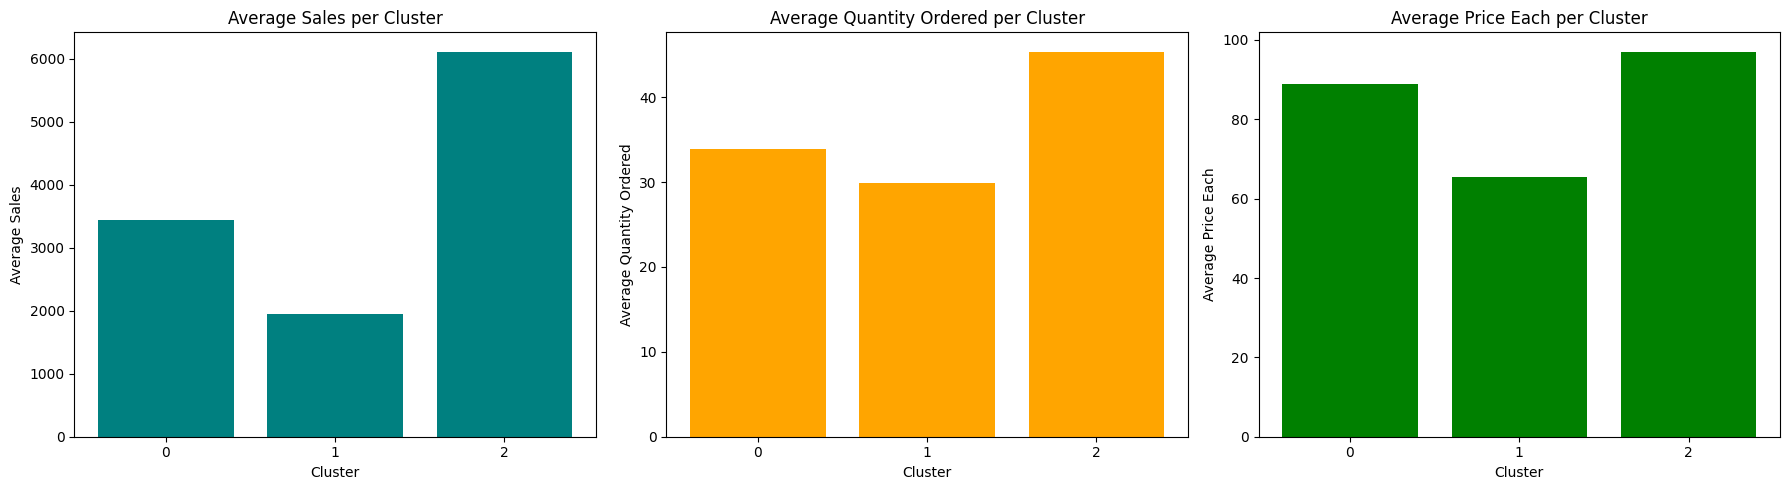

In [37]:
import matplotlib.pyplot as plt

# Create a single figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=False)

# Average Sales per Cluster
axes[0].bar(cluster_profiles.index, cluster_profiles['SALES']['mean'], color='teal')
axes[0].set_title("Average Sales per Cluster")
axes[0].set_xlabel("Cluster")
axes[0].set_ylabel("Average Sales")
axes[0].set_xticks(cluster_profiles.index)
axes[0].tick_params(axis='x', rotation=0)

# Quantity Ordered per Cluster
axes[1].bar(cluster_profiles.index, cluster_profiles['QUANTITYORDERED']['mean'], color='orange')
axes[1].set_title("Average Quantity Ordered per Cluster")
axes[1].set_xlabel("Cluster")
axes[1].set_ylabel("Average Quantity Ordered")
axes[1].set_xticks(cluster_profiles.index)
axes[1].tick_params(axis='x', rotation=0)

# Price Each per Cluster
axes[2].bar(cluster_profiles.index, cluster_profiles['PRICEEACH']['mean'], color='green')
axes[2].set_title("Average Price Each per Cluster")
axes[2].set_xlabel("Cluster")
axes[2].set_ylabel("Average Price Each")
axes[2].set_xticks(cluster_profiles.index)
axes[2].tick_params(axis='x', rotation=0)

# Adjust layout for clarity
plt.tight_layout()
plt.show()